#                                 Gold price prediction using LSTM

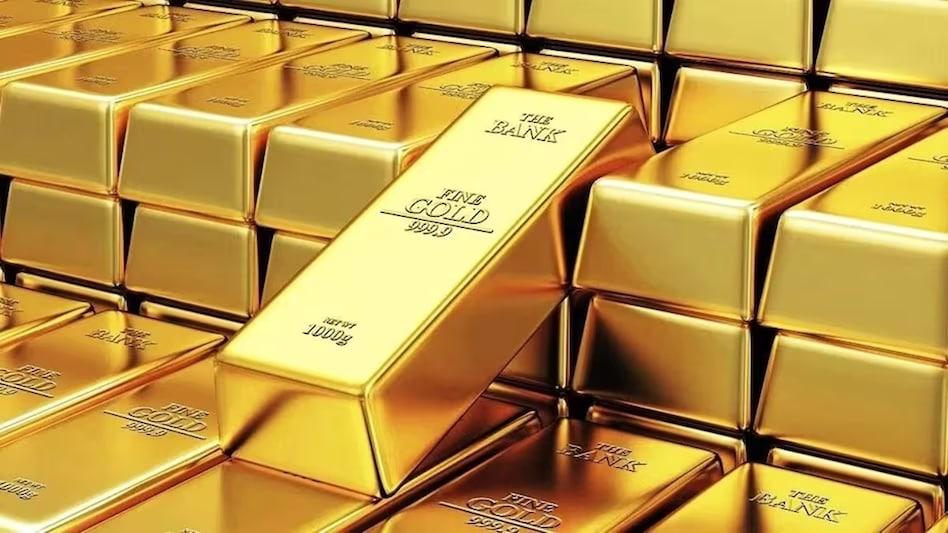

## Importing libraries

In [1]:
!pip install yfinance

import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')



Defaulting to user installation because normal site-packages is not writeable


D:\notebook\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Downloading the Data

In [2]:
end_date = datetime.datetime.today()

In [3]:
gold_data = yf.download('GC=F',start = '2020-01-01',end=end_date)

[*********************100%%**********************]  1 of 1 completed


# Dataset overview

In [4]:
gold_data.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
2020-01-03  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2020-01-06  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
2020-01-07  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
2020-01-08  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

            Volume  
Date                
2020-01-02     214  
2020-01-03     107  
2020-01-06     416  
2020-01-07      47  
2020-01-08     236

In [5]:
gold_data.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-01-08  2019.099976  2033.699951  2019.099976  2026.599976  2026.599976   
2024-01-09  2035.800049  2035.800049  2026.400024  2026.400024  2026.400024   
2024-01-10  2029.000000  2035.599976  2021.699951  2021.699951  2021.699951   
2024-01-11  2025.099976  2025.099976  2014.300049  2014.300049  2014.300049   
2024-01-12  2031.099976  2057.000000  2031.099976  2046.699951  2046.699951   

            Volume  
Date                
2024-01-08      10  
2024-01-09      27  
2024-01-10     538  
2024-01-11      97  
2024-01-12      97

In [6]:
gold_data.shape

(1016, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1016 entries, 2020-01-02 to 2024-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1016 non-null   float64
 1   High       1016 non-null   float64
 2   Low        1016 non-null   float64
 3   Close      1016 non-null   float64
 4   Adj Close  1016 non-null   float64
 5   Volume     1016 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.6 KB


In [8]:
gold_data.describe()

Open         High          Low        Close    Adj Close  \
count  1016.000000  1016.000000  1016.000000  1016.000000  1016.000000   
mean   1830.065256  1839.432186  1820.961615  1830.160431  1830.160431   
std     115.314694   114.910056   115.875134   115.195566   115.195566   
min    1469.300049  1484.000000  1452.099976  1477.300049  1477.300049   
25%    1761.024994  1767.975006  1750.800018  1758.225037  1758.225037   
50%    1827.250000  1836.500000  1819.400024  1829.950012  1829.950012   
75%    1921.950012  1928.599976  1912.300049  1921.099976  1921.099976   
max    2081.600098  2130.199951  2066.500000  2081.899902  2081.899902   

              Volume  
count    1016.000000  
mean     4347.390748  
std     23953.789175  
min         0.000000  
25%        82.000000  
50%       244.500000  
75%       654.500000  
max    251274.000000

In [9]:
gold_data.isnull().values.any()

False

# Data visualization

<AxesSubplot:xlabel='Date'>

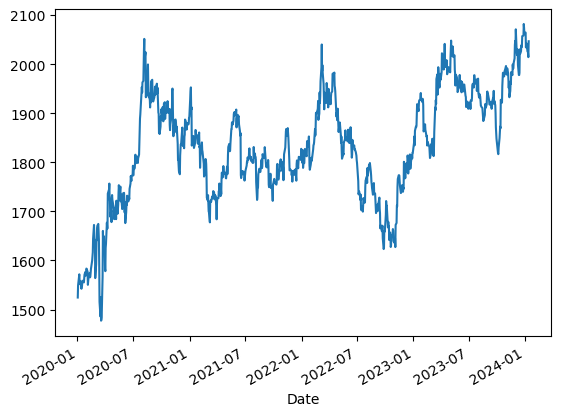

In [10]:
gold_data['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

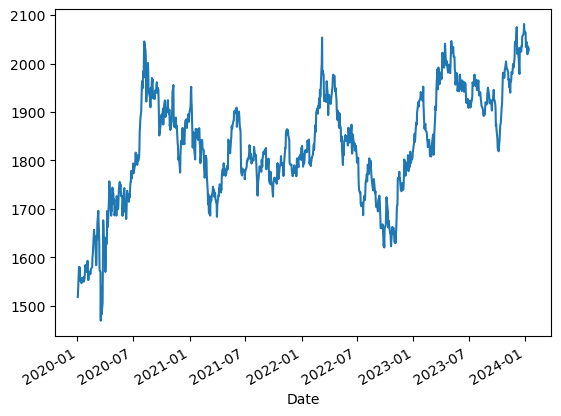

In [11]:
gold_data['Open'].plot()

<AxesSubplot:xlabel='Date'>

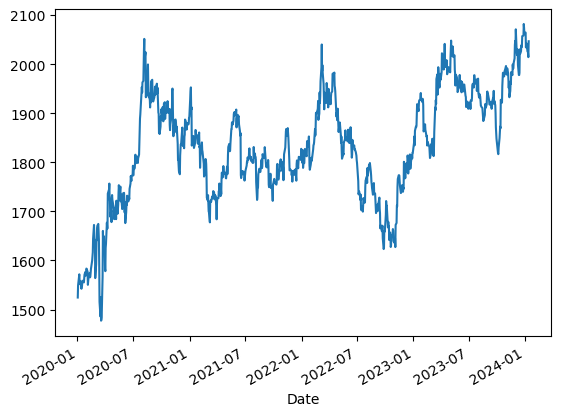

In [12]:
gold_data['Close'].plot()

<AxesSubplot:xlabel='Date'>

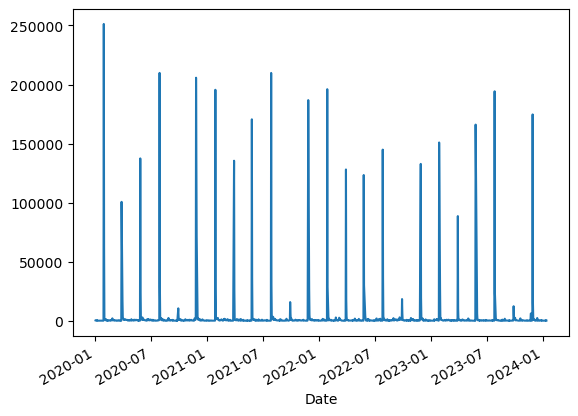

In [13]:
gold_data['Volume'].plot()

### Box plot

<AxesSubplot:title={'center':'Box Plot of Prices'}>

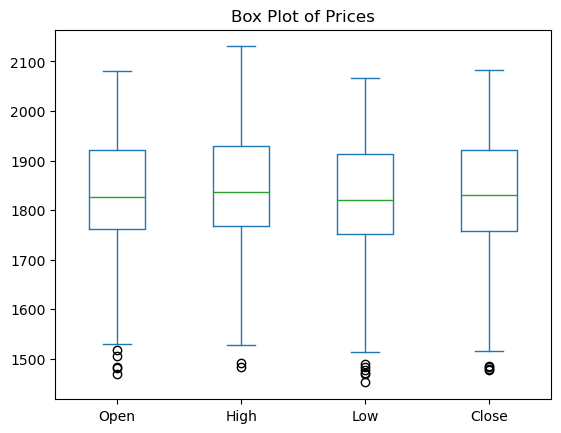

In [14]:
gold_data[['Open', 'High', 'Low', 'Close']].plot(kind='box', title='Box Plot of Prices')


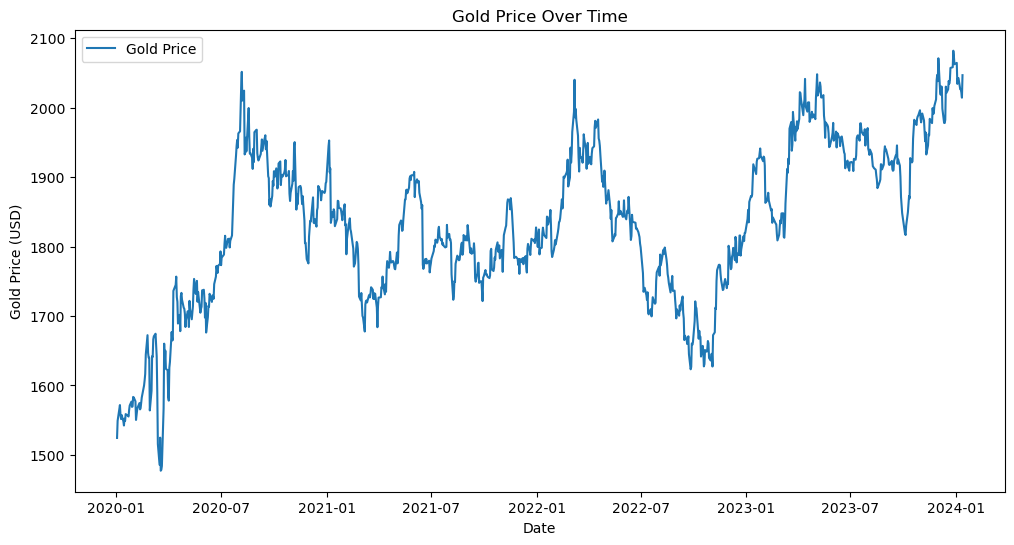

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.show()

### Heatmap

In [16]:
correlation_matrix = gold_data.corr()
coef=correlation_matrix["Close"].sort_values(ascending=False)


#### Positively correlated variables

In [17]:
pos_corr=coef[coef>0]
pos_corr


Close        1.000000
Adj Close    1.000000
Low          0.996108
High         0.994352
Open         0.989966
Name: Close, dtype: float64

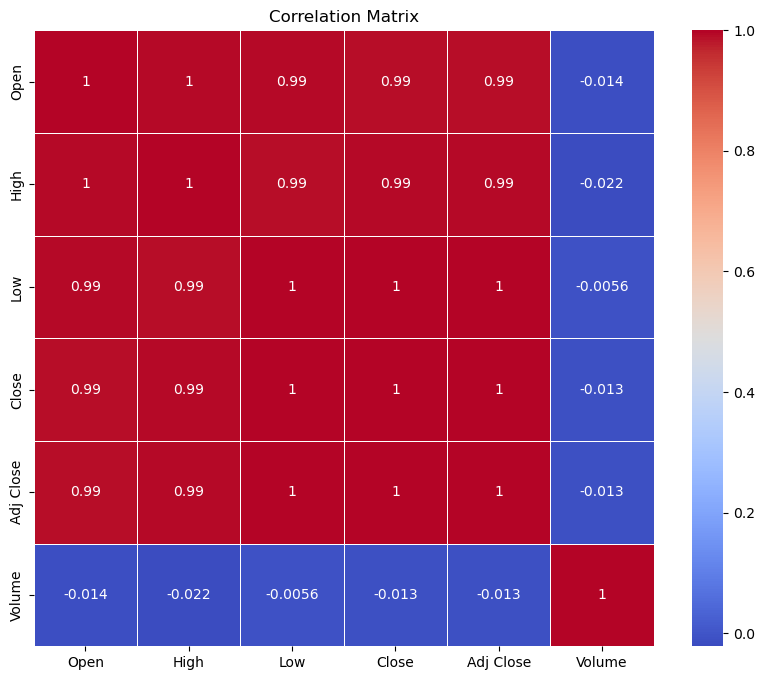

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Pairplot

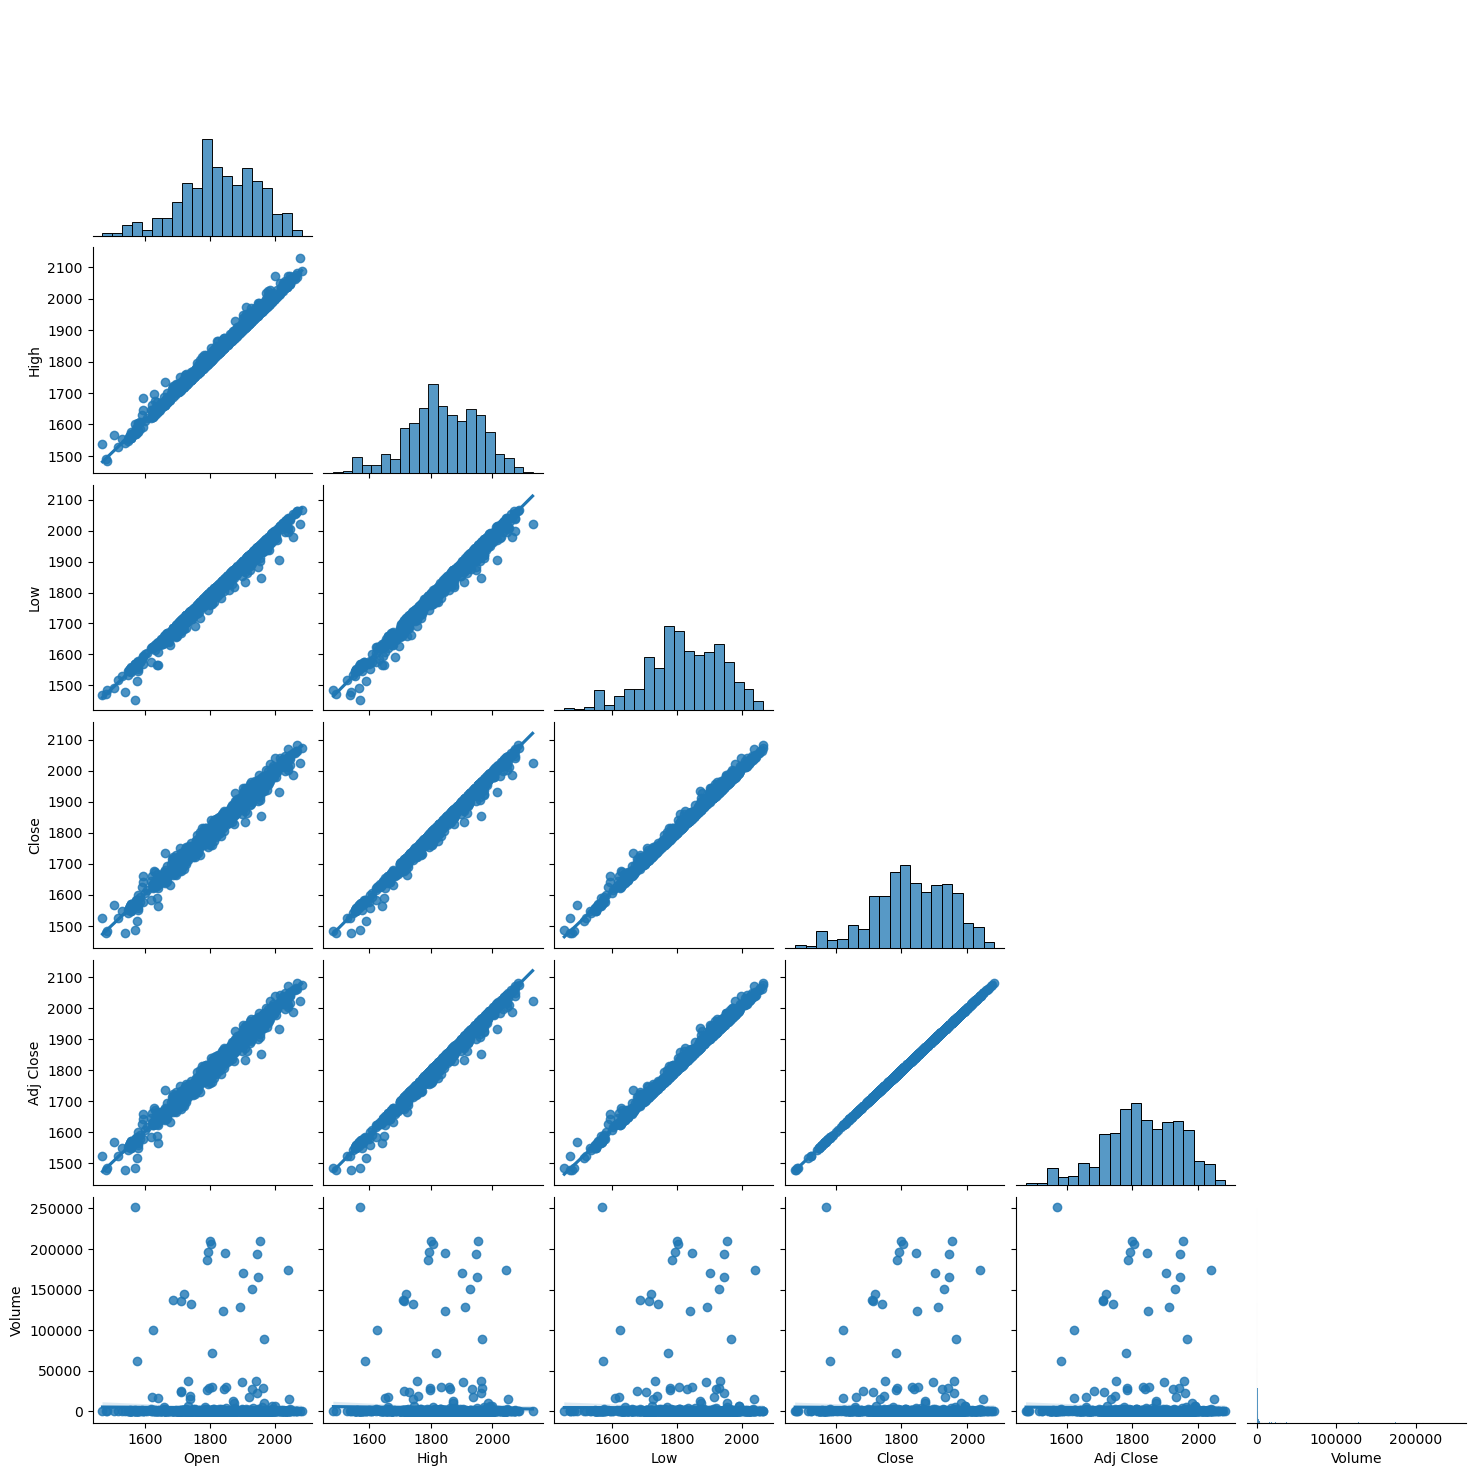

In [19]:
sns.pairplot(gold_data, kind= 'reg', corner= True)

### Distplot

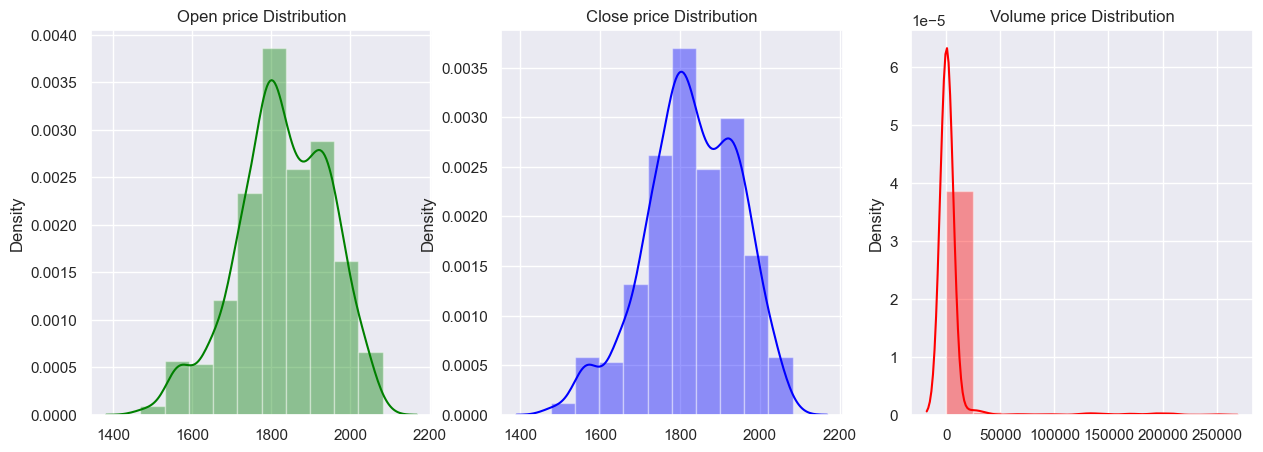

In [20]:
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.distplot(gold_data, ax=axes[0], x=gold_data['Open'], kde=True, bins = 10, color = 'green').set(title="Open price Distribution");
sns.distplot(gold_data, ax=axes[1],  x=gold_data['Close'], kde=True, bins = 10, color = 'blue').set(title="Close price Distribution");
sns.distplot(gold_data, ax=axes[2],  x=gold_data['Volume'], kde=True, bins = 10, color = 'red').set(title="Volume price Distribution");



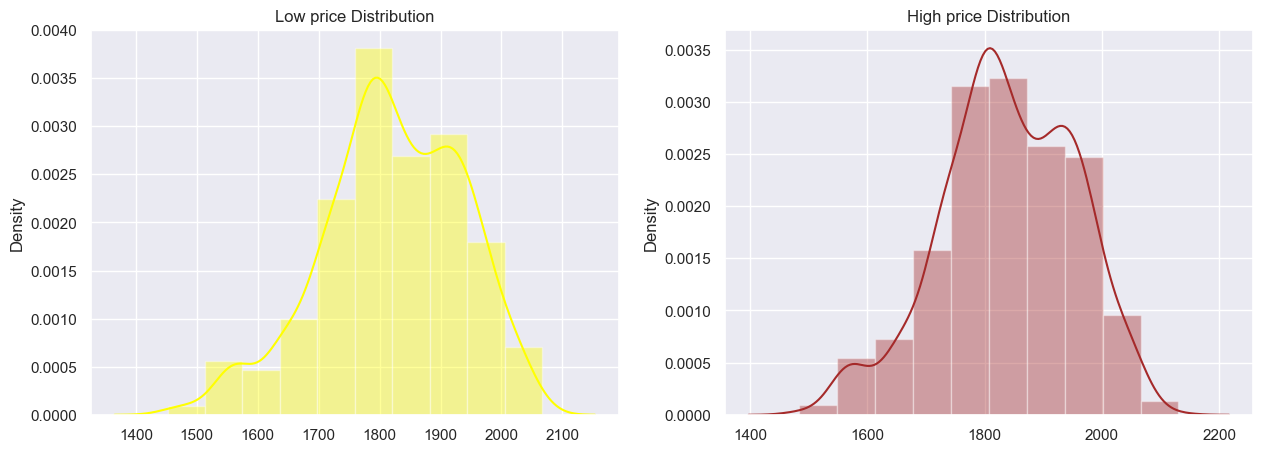

In [21]:
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.distplot(gold_data, ax=axes[0], x=gold_data['Low'], kde=True, bins = 10, color = 'yellow').set(title="Low price Distribution");
sns.distplot(gold_data, ax=axes[1],  x=gold_data['High'], kde=True, bins = 10, color = 'brown').set(title="High price Distribution");


### Lineplot

In [22]:
gold_data.reset_index(inplace=True)

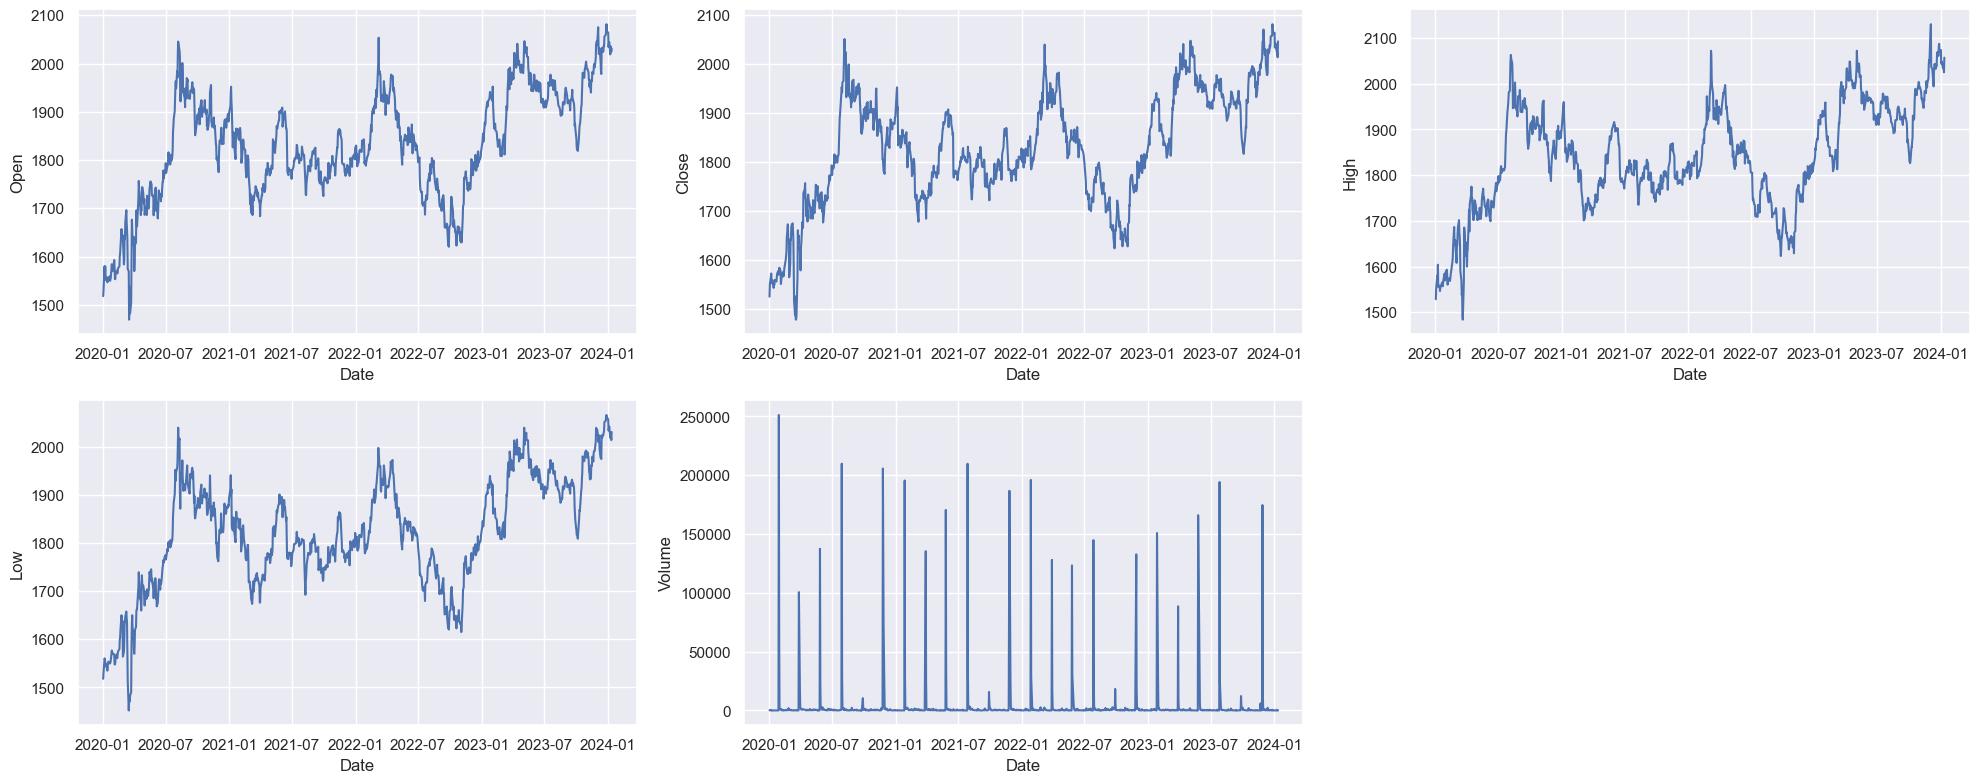

In [23]:
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(2,3, figsize=(20, 8))

sns.lineplot(data = gold_data, ax = axes[0,0], x='Date', y='Open');
sns.lineplot(data = gold_data, ax = axes[0,1], x='Date', y='Close' );
sns.lineplot(data = gold_data, ax = axes[0,2], x='Date', y='High' );
sns.lineplot(data = gold_data, ax = axes[1,0], x='Date', y='Low' );
sns.lineplot(data = gold_data, ax = axes[1,1], x='Date', y='Volume');

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

### Scatter plot

<AxesSubplot:xlabel='Date', ylabel='Open'>

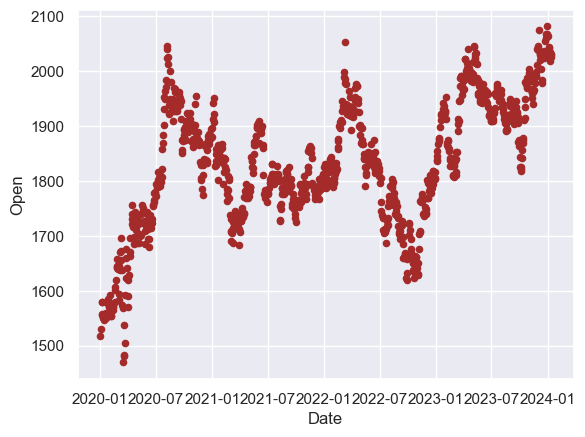

In [24]:
gold_data.plot(kind='scatter', x='Date', y='Open',color='brown')

<AxesSubplot:xlabel='Date', ylabel='High'>

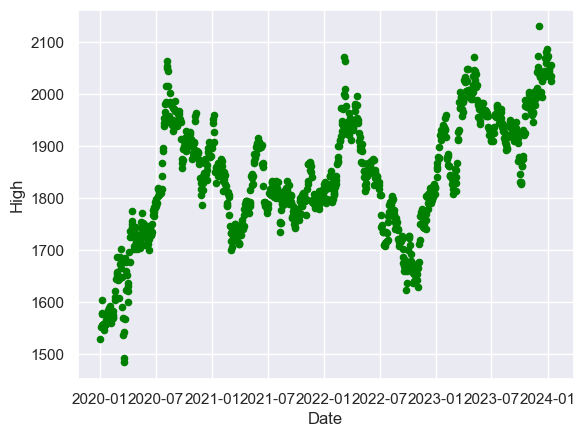

In [25]:
gold_data.plot(kind='scatter', x='Date', y='High',color='green')

<AxesSubplot:xlabel='Date', ylabel='Volume'>

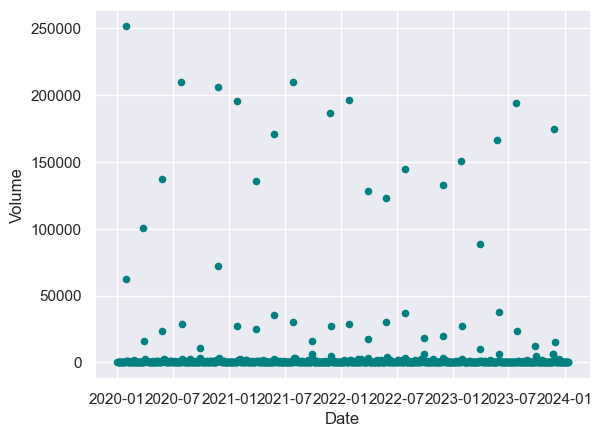

In [26]:
gold_data.plot(kind='scatter', x='Date', y='Volume',color='teal')

## Computing Daily Returns

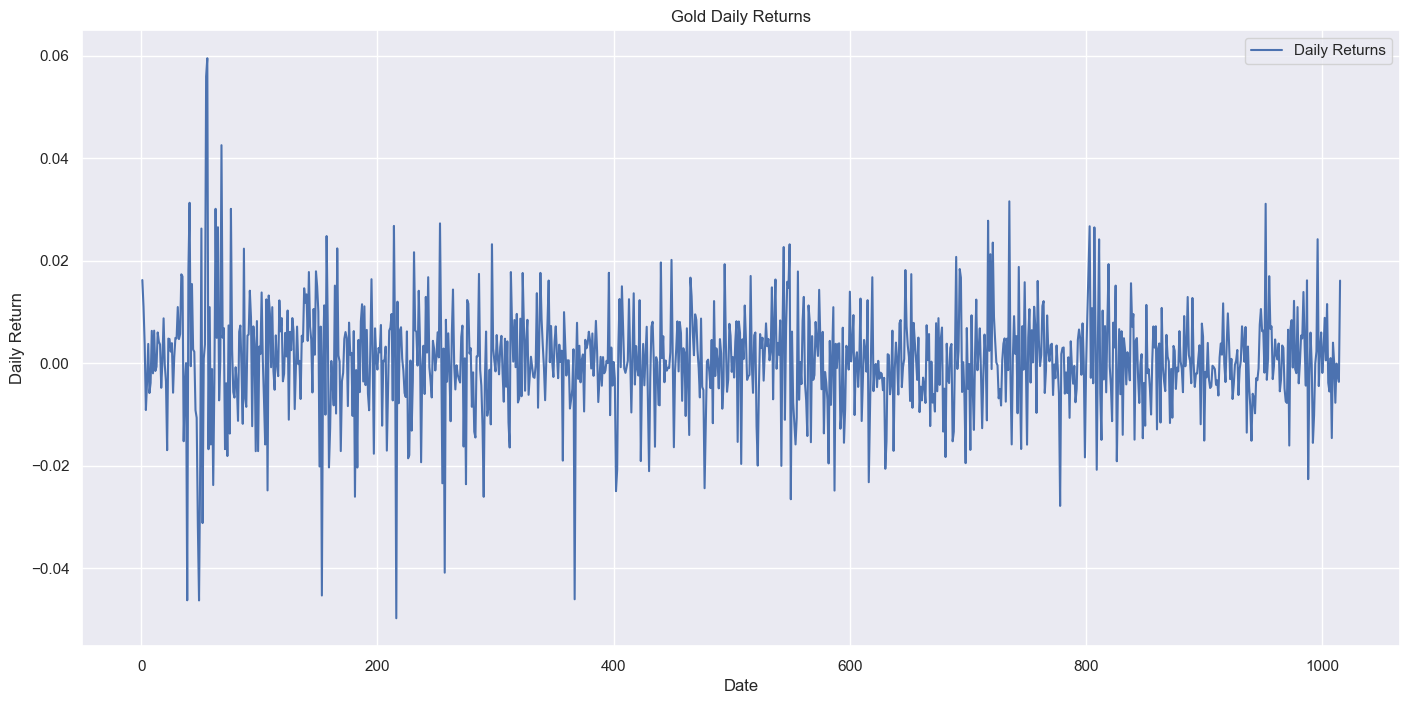

In [27]:
gold_data['Daily_Return'] = gold_data['Close'].pct_change()
plt.figure(figsize=(17, 8))
plt.plot(gold_data['Daily_Return'], label='Daily Returns')
plt.title('Gold Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

### Rolling Mean and Standard deviation

In [28]:
rolling_window = 30
gold_data['Rolling_Mean'] = gold_data['Close'].rolling(window=rolling_window).mean()
gold_data['Rolling_Std'] = gold_data['Close'].rolling(window=rolling_window).std()


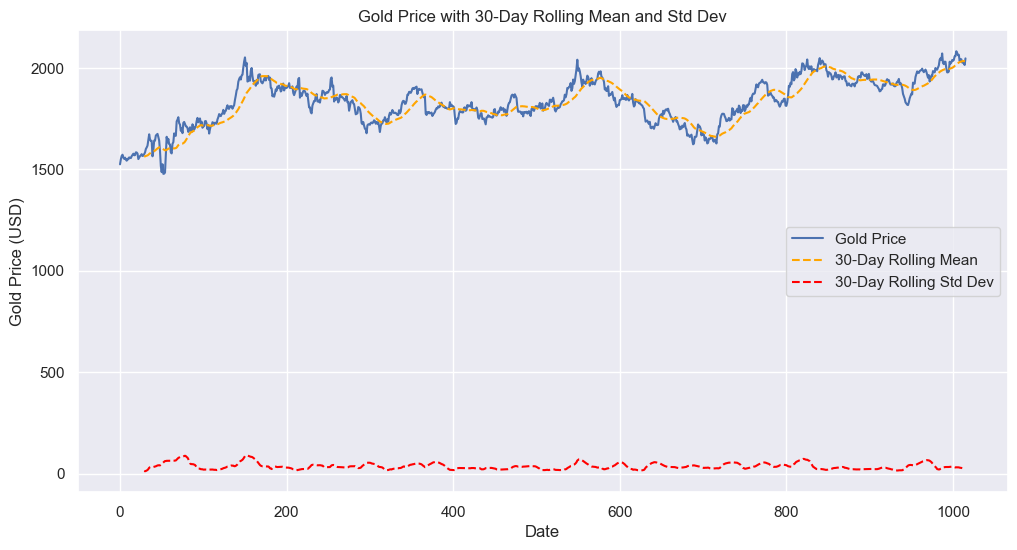

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Price')
plt.plot(gold_data['Rolling_Mean'], label=f'{rolling_window}-Day Rolling Mean', linestyle='--', color='orange')
plt.plot(gold_data['Rolling_Std'], label=f'{rolling_window}-Day Rolling Std Dev', linestyle='--', color='red')
plt.title(f'Gold Price with {rolling_window}-Day Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.show()

### Histogram

In [30]:
fig = px.histogram(gold_data, x = "Close", y = "Volume",text_auto = True)
fig.show()

## Data Scaling

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data['Close'].values.reshape(-1, 1))


In [32]:
print(gold_data['Close'])

0       1524.500000
1       1549.199951
2       1566.199951
3       1571.800049
4       1557.400024
           ...     
1011    2026.599976
1012    2026.400024
1013    2021.699951
1014    2014.300049
1015    2046.699951
Name: Close, Length: 1016, dtype: float64


### Create Training Dataset

In [33]:
training_data_len = int(np.ceil(len(scaled_data) * .95))
print('training data length:',training_data_len)

training data length: 966


In [34]:
train_data = scaled_data[0:int(training_data_len), :]

In [35]:
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [36]:
x_train, y_train = np.array(x_train), np.array(y_train)

#### Reshaping Data

In [37]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
print(x_train.shape)


(906, 60, 1)


### Building LSTM model

In [39]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(2))

model.compile(optimizer='adam', loss = 'mean_squared_error')


### Training the model

In [40]:
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split = 0.1)


Epoch 1/50

13/13 [==============================] - 43s 2s/step - loss: 0.0579 - val_loss: 0.0082
Epoch 2/50
13/13 [==============================] - 17s 1s/step - loss: 0.0072 - val_loss: 0.0043
Epoch 3/50
13/13 [==============================] - 16s 1s/step - loss: 0.0046 - val_loss: 0.0053
Epoch 4/50
13/13 [==============================] - 13s 1s/step - loss: 0.0038 - val_loss: 0.0038
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.0035 - val_loss: 0.0042
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.0034 - val_loss: 0.0037
Epoch 7/50
13/13 [==============================] - 12s 906ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 8/50
13/13 [==============================] - 13s 1s/step - loss: 0.0029 - val_loss: 0.0033
Epoch 9/50
13/13 [==============================] - 13s 1s/step - loss: 0.0028 - val_loss: 0.0035
Epoch 10/50
13/13 [==============================] - 13s 981ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 11/50


### Creating Test Dataset

In [41]:
test_data = scaled_data[training_data_len - 60:, :]

In [42]:
x_test = []
y_test = gold_data['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [43]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
print(x_test.shape)

(50, 60, 1)


### Making Predictions

In [45]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 5s 234ms/step


In [46]:

y_test_reshape = y_test.reshape((len(y_test), 1))
predictions_reshaped = predictions[:, 0]  
print(y_test_reshape.shape)


(50, 1)


### Model Evaluation

In [47]:
rmse = np.sqrt(np.mean(((predictions_reshaped - y_test_reshape)**2)))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 50.341369025273785


### Visualising the results

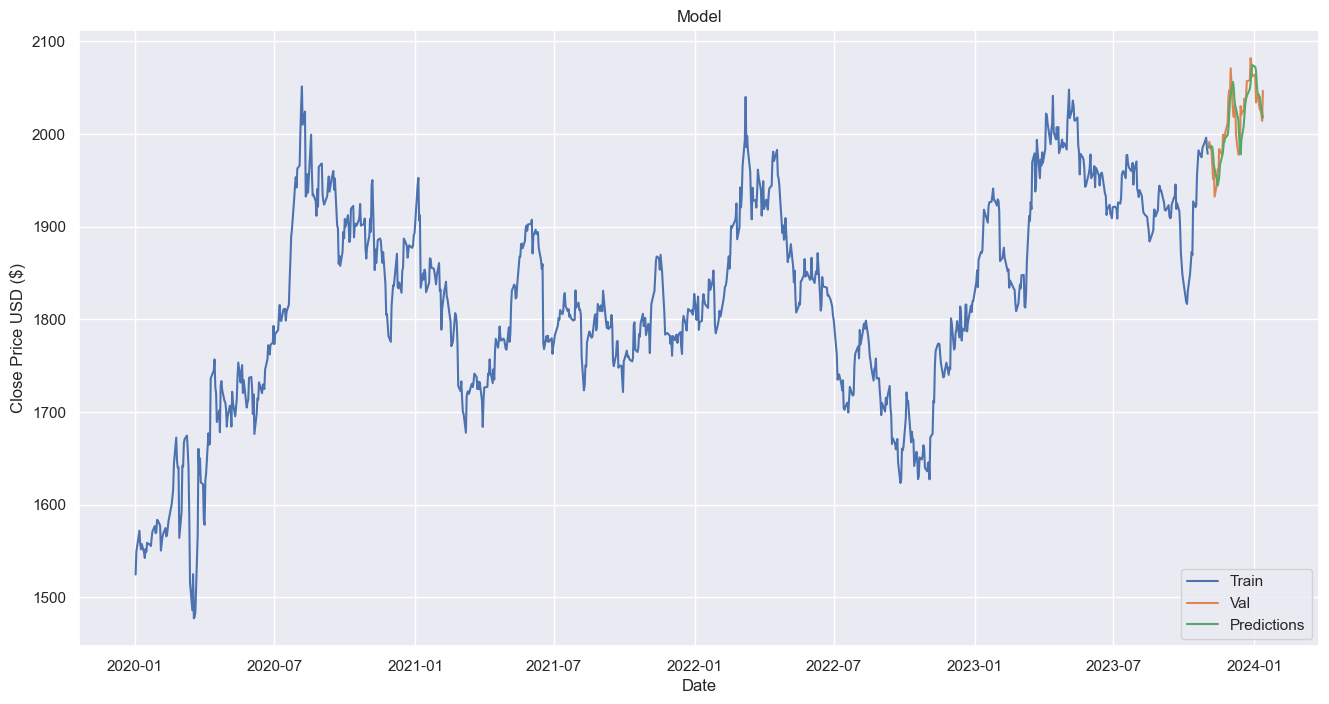

In [53]:
train = gold_data[:training_data_len]
valid = gold_data[training_data_len:]
valid['Predictions'] = predictions_reshaped

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Date'], train['Close'])
plt.plot(valid['Date'], valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


### Predicted Data

In [49]:
valid[['Date','Close','Predictions']].head(10)

Date        Close  Predictions
966 2023-11-02  1985.599976  1987.048584
967 2023-11-03  1991.500000  1985.336060
968 2023-11-06  1981.599976  1987.096436
969 2023-11-07  1966.800049  1985.932495
970 2023-11-08  1951.500000  1979.083618
971 2023-11-09  1964.199951  1967.364746
972 2023-11-10  1932.599976  1962.395752
973 2023-11-13  1945.500000  1950.307983
974 2023-11-14  1961.800049  1944.583130
975 2023-11-15  1960.099976  1948.425659

In [50]:
valid[['Date','Close','Predictions']].tail(10)

Date        Close  Predictions
1006 2023-12-29  2062.399902  2074.544434
1007 2024-01-02  2064.399902  2072.553223
1008 2024-01-03  2034.199951  2069.027344
1009 2024-01-04  2042.300049  2054.515137
1010 2024-01-05  2042.400024  2044.804688
1011 2024-01-08  2026.599976  2039.912598
1012 2024-01-09  2026.400024  2032.528931
1013 2024-01-10  2021.699951  2027.212402
1014 2024-01-11  2014.300049  2022.872070
1015 2024-01-12  2046.699951  2017.871826